In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Data

In [4]:
data = pd.read_csv('Dataset/Product_Exclusive_Classification.csv')
data.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

# Exploratory Data Analysis (EDA)

First, let's check at the list of columns in the dataset and separate them into numerical and categorical columns using. `info()`:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


- Data has a total 8000 observations
- Data still have Null Values except for columns `id`, `brand`, `exclusive`
- Target Classification column : `exclusive` 

In [6]:
# separate numerical and categorical features
cats = ['brand', 'category']
nums = ['rating', 'number_of_reviews', 'love', 'price', 'value_price','exclusive']

## Numerical Approach

In [6]:
data.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [7]:
data['exclusive'].value_counts() / len(data) * 100

exclusive
0    74.4125
1    25.5875
Name: count, dtype: float64

- id                   : Unique identifier for each item in the dataset. this column are not relevant for Prediction Model (thus will be dropped in preprocessing)
- rating               : have a normal distribution, minimum value `0` maximum value `5.0`. 
- number_of_reviews    : Right Skewed with a mean `303.574` and median `56.0`. potentially have outliers.
- love                 : mean `1.756` median `5.500`. right skewed.
- price and value_price: mean `49.900` median `35.000`. right skewed.
- exclusive            : the target columns are imbalanced (will be handled in preprocessing)

*Skewed Distribution indicated by mean and median values that are far linked.*

In [8]:
data[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


The dataset comprises 310 unique brands, 142 distinct product categories, and 10 different ratings. The brand "SEPHORA COLLECTION" has the highest occurrence, appearing 492 times. The most prevalent product category is "Perfume" with 619 instances. Users predominantly give a rating of 4.5. The data exhibits potential imbalance, potentially due to the higher number of products in non-exclusive categories in comparison to exclusive categories.

## Graphical Approach

### Univariate Analysis

for univariate analysis, *violin plot* will be used for numeric column, and *count plot* for categorical. Plot will be devided based on feature and target, it will be useful for examining whether there are differences between the positive and negative classes.

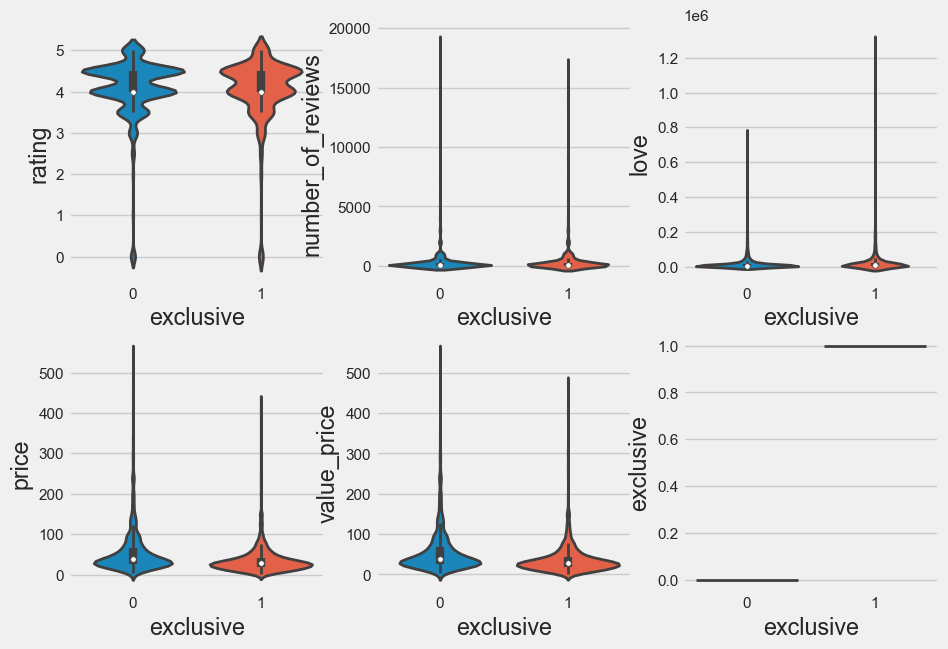

In [9]:
# showing violin plot

import math

plt.figure(figsize=(10, 7))
for i in range (0, len(nums)):
    plt.subplot(math.ceil(len(nums)/3), 3, i+1)
    sns.violinplot(data=data, y=nums[i], x='exclusive', linewidth=2, orient='v')

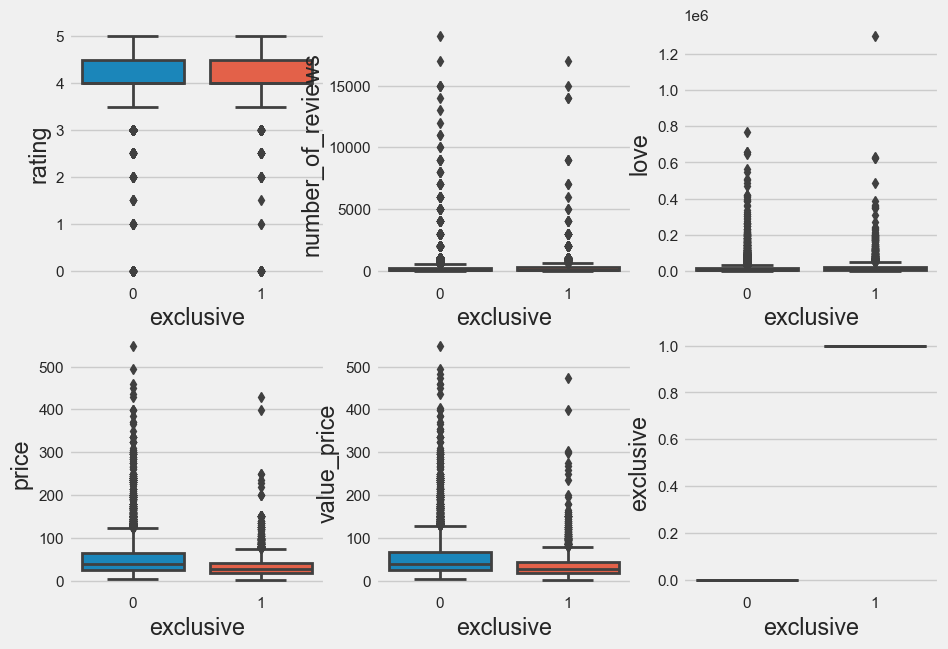

In [10]:
# boxplot
import math

plt.figure(figsize=(10, 7))
for i in range (0, len(nums)):
    plt.subplot(math.ceil(len(nums)/3), 3, i+1)
    sns.boxplot(data=data, y=nums[i], x='exclusive', linewidth=2, orient='v')

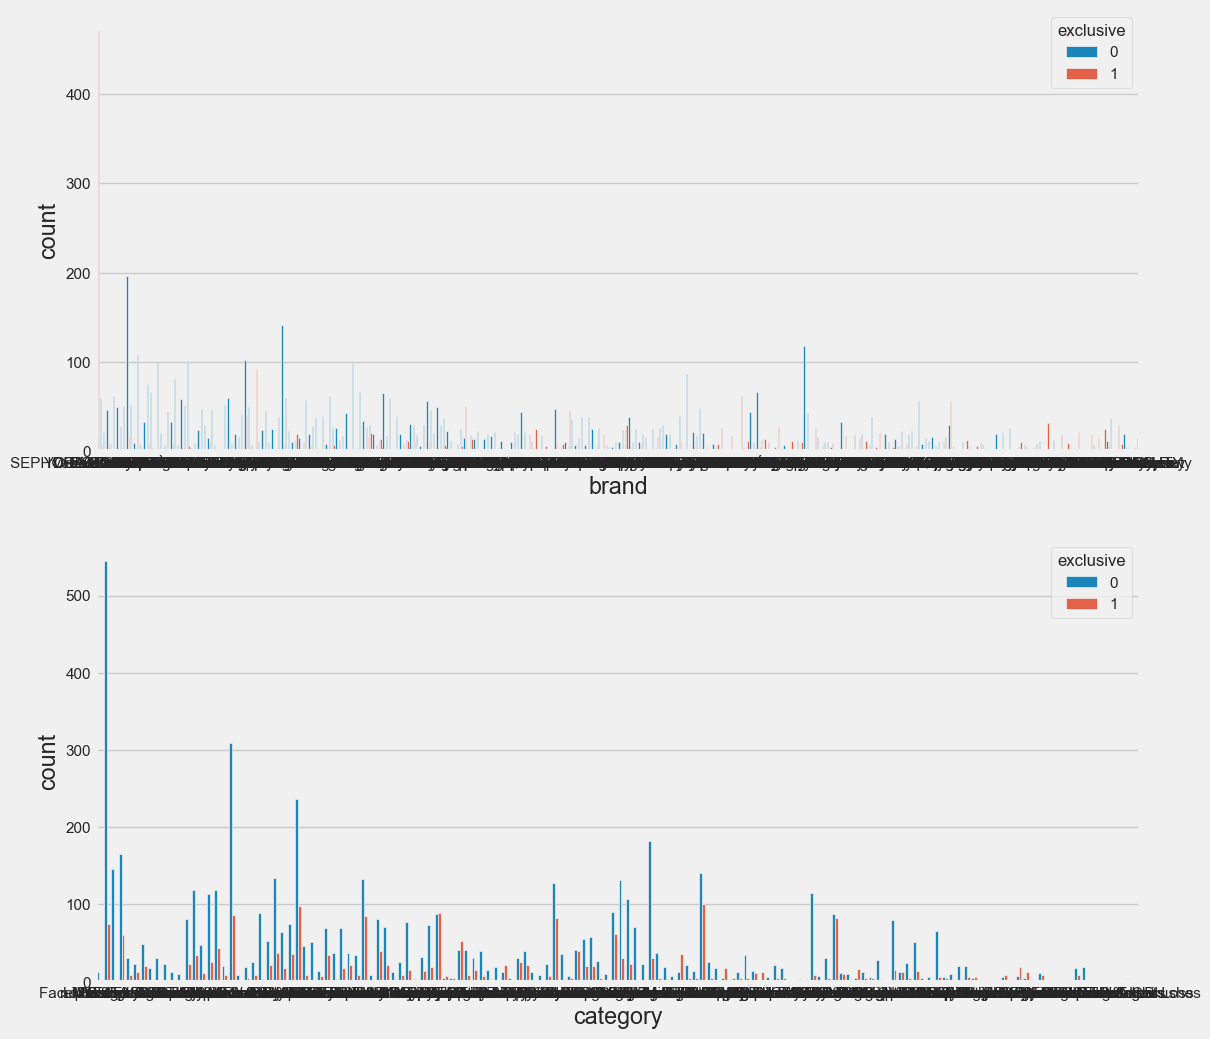

In [10]:
# countplot

plt.figure(figsize=(12, 12))
for i in range (0, len(cats)):
    plt.subplot(math.ceil(len(cats)/1), 1, i+1)
    sns.countplot(data=data, x=cats[i], hue='exclusive')

There are 310 unique values in `brand` columns, and 142 in `category`. thus the countplot wont be much of help here

Alternatively, we can simply check the most frequently occurring values using value_counts(). Instead of outputting the raw numbers, we can display the percentages as follows:

In [10]:
# check 10 most frequently occurring values

for cat in cats:
    print('Category: ', cat)
    display((data[cat].value_counts() / len(data) * 100)[:10])
    print()

Category:  brand


brand
SEPHORA COLLECTION    6.1500
CLINIQUE              2.6375
TOM FORD              1.8750
tarte                 1.7875
Kiehl's Since 1851    1.5250
Dior                  1.4750
Fresh                 1.3500
Lancôme               1.3000
Bumble and bumble     1.2375
MAKE UP FOR EVER      1.1875
Name: count, dtype: float64


Category:  category


category
Perfume                      7.7375
Moisturizers                 4.9375
Face Serums                  4.1750
Value & Gift Sets            3.0125
Face Wash & Cleansers        2.8125
Face Masks                   2.7250
Hair Styling Products        2.6625
Rollerballs & Travel Size    2.6375
Face Brushes                 2.2000
Eye Creams & Treatments      2.1375
Name: count, dtype: float64

### Multivariate Analysis

Regarding multivariate analysis, there are two components will be presented:

- correlation heatmap to assess the linear correlation among the numeric columns.
- pairplot to visually inspect whether there are any discernible patterns resulting from the interaction between two numeric columns.

<Axes: >

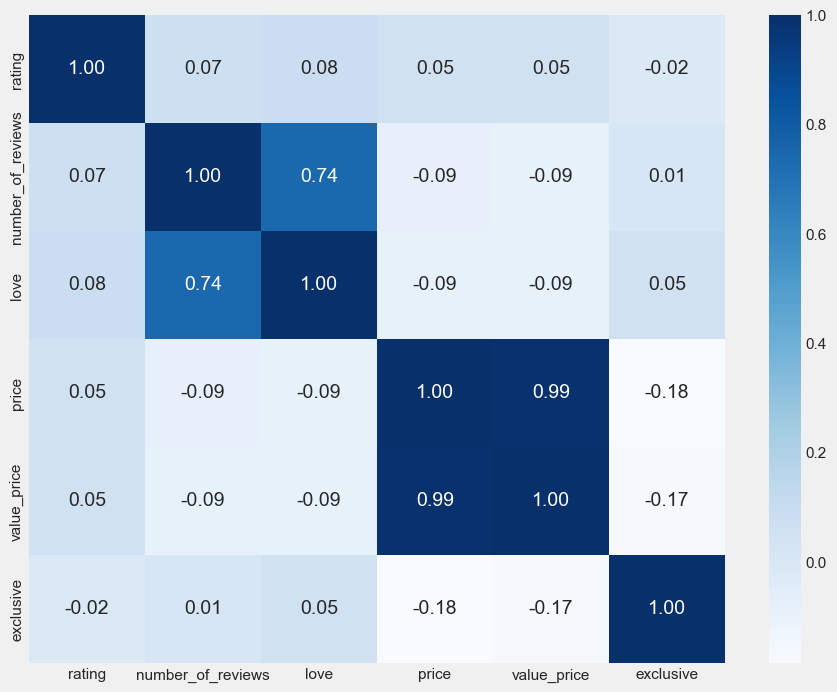

In [20]:
# correlation heatmap for numerical features

plt.figure(figsize=(10, 8))
sns.heatmap(data[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1000x800 with 0 Axes>

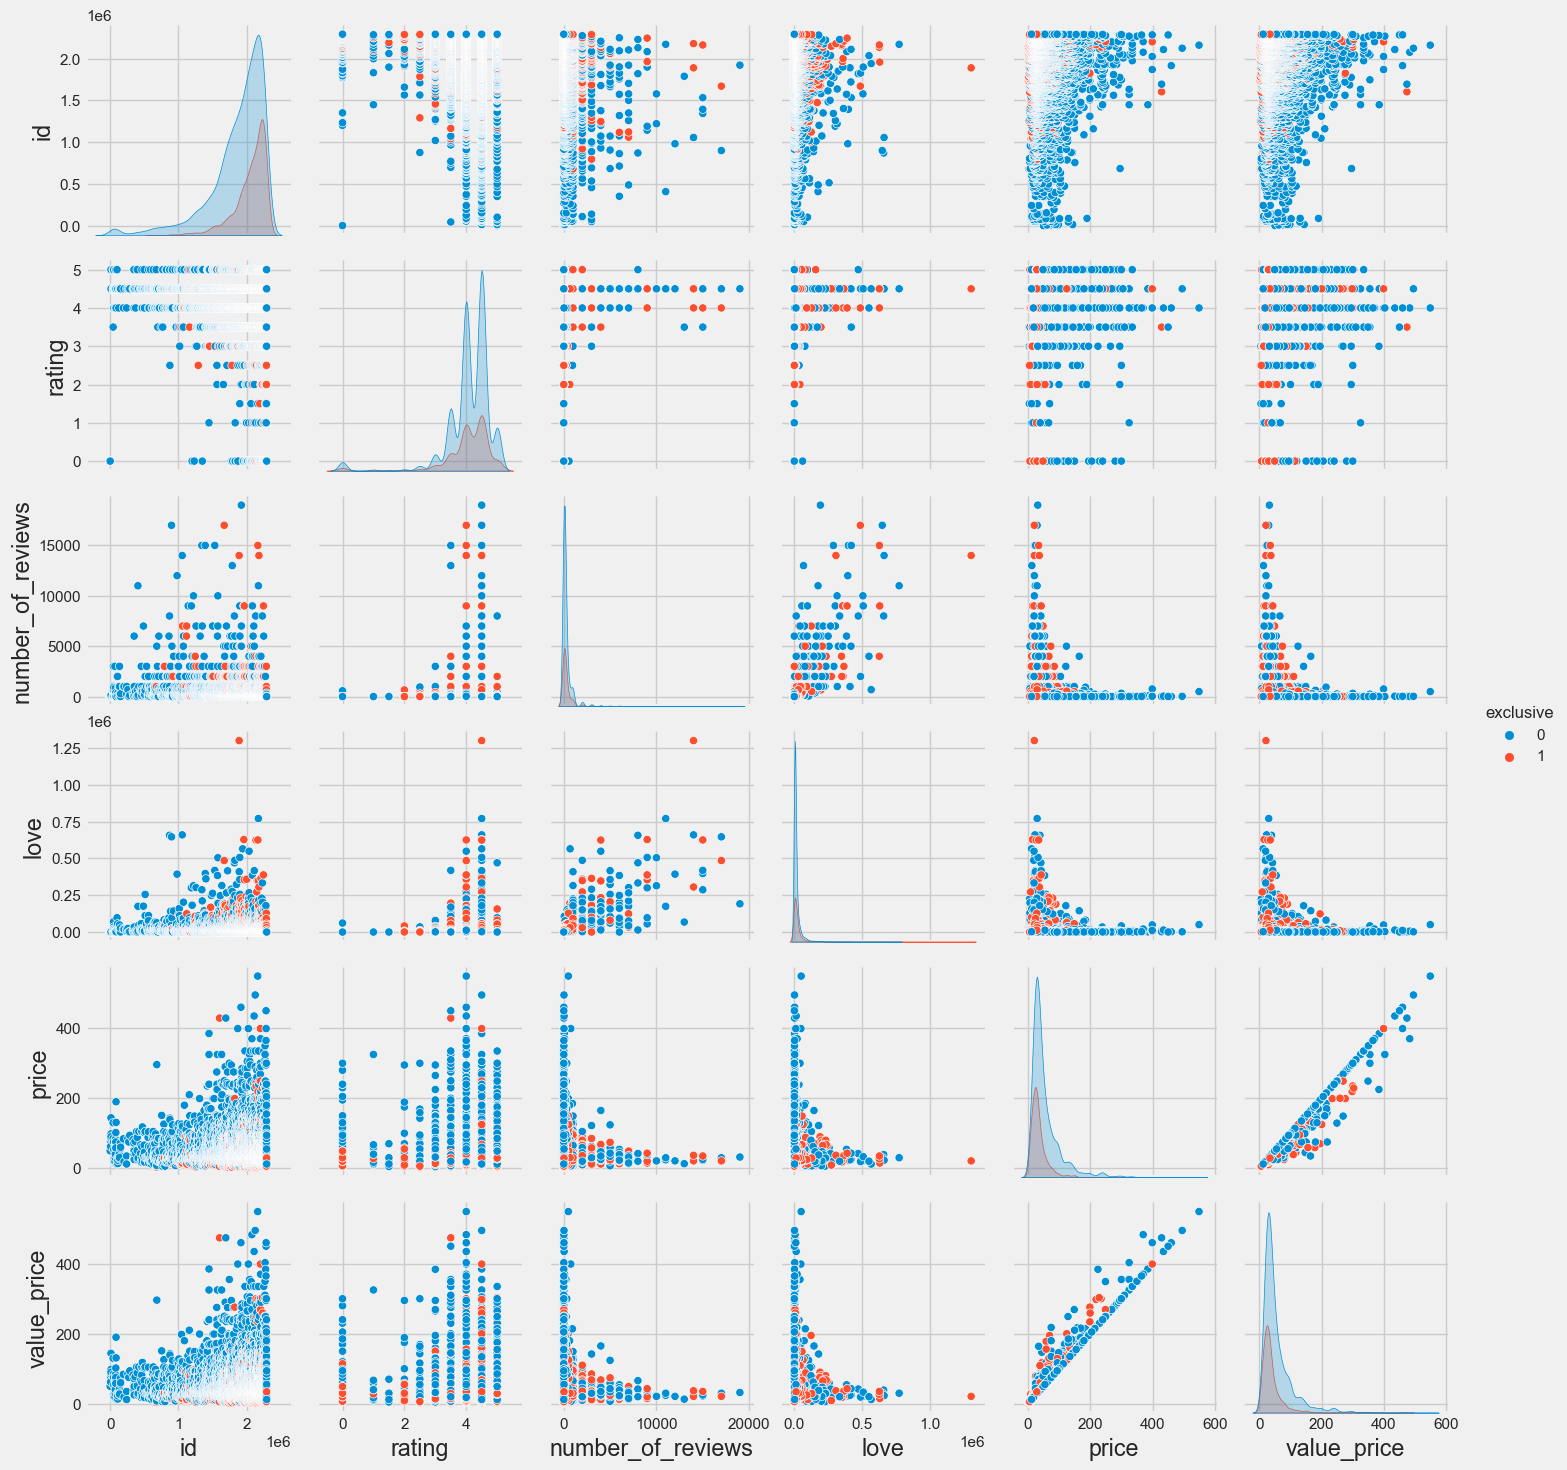

In [23]:
# pairplot

plt.figure(figsize=(10, 8))
sns.pairplot(data, diag_kind='kde', hue='exclusive')

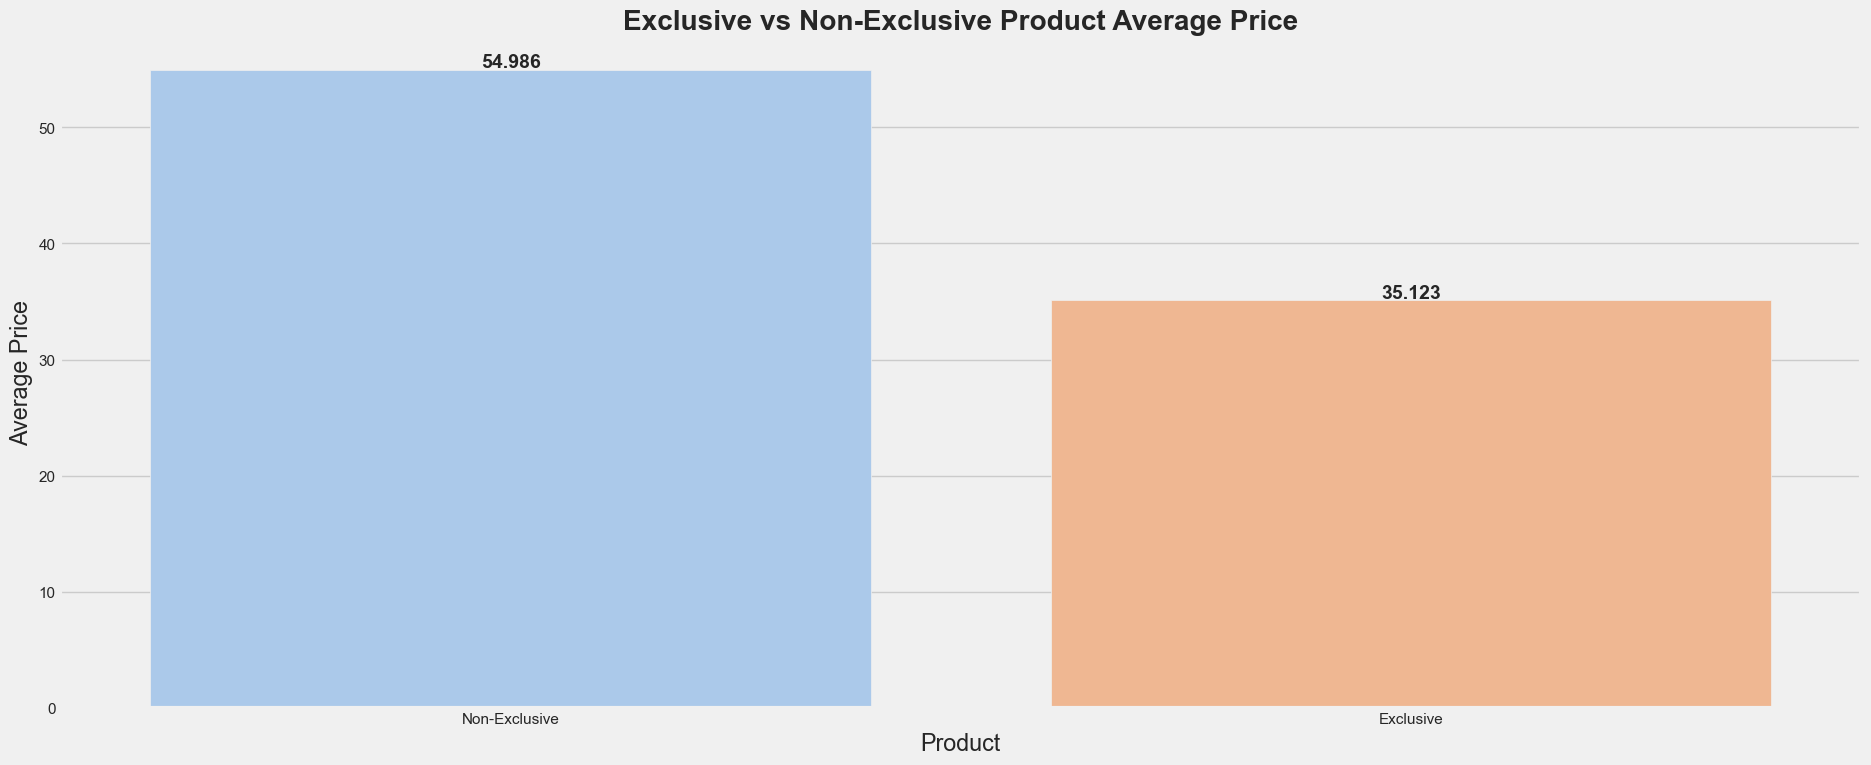

In [40]:
# checking exclusive vs non_exclusive product average price

avg_price = data.groupby('exclusive')['price'].mean().reset_index()

# changing exclusive value
avg_price['exclusive'] = avg_price['exclusive'].map({0:'Non-Exclusive',1:'Exclusive'})

# plotting
ax = sns.barplot(avg_price, x='exclusive', y='price', palette='pastel')

# annotating price
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

# adding tittle
plt.title('Exclusive vs Non-Exclusive Product Average Price', fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Average Price')

plt.show()

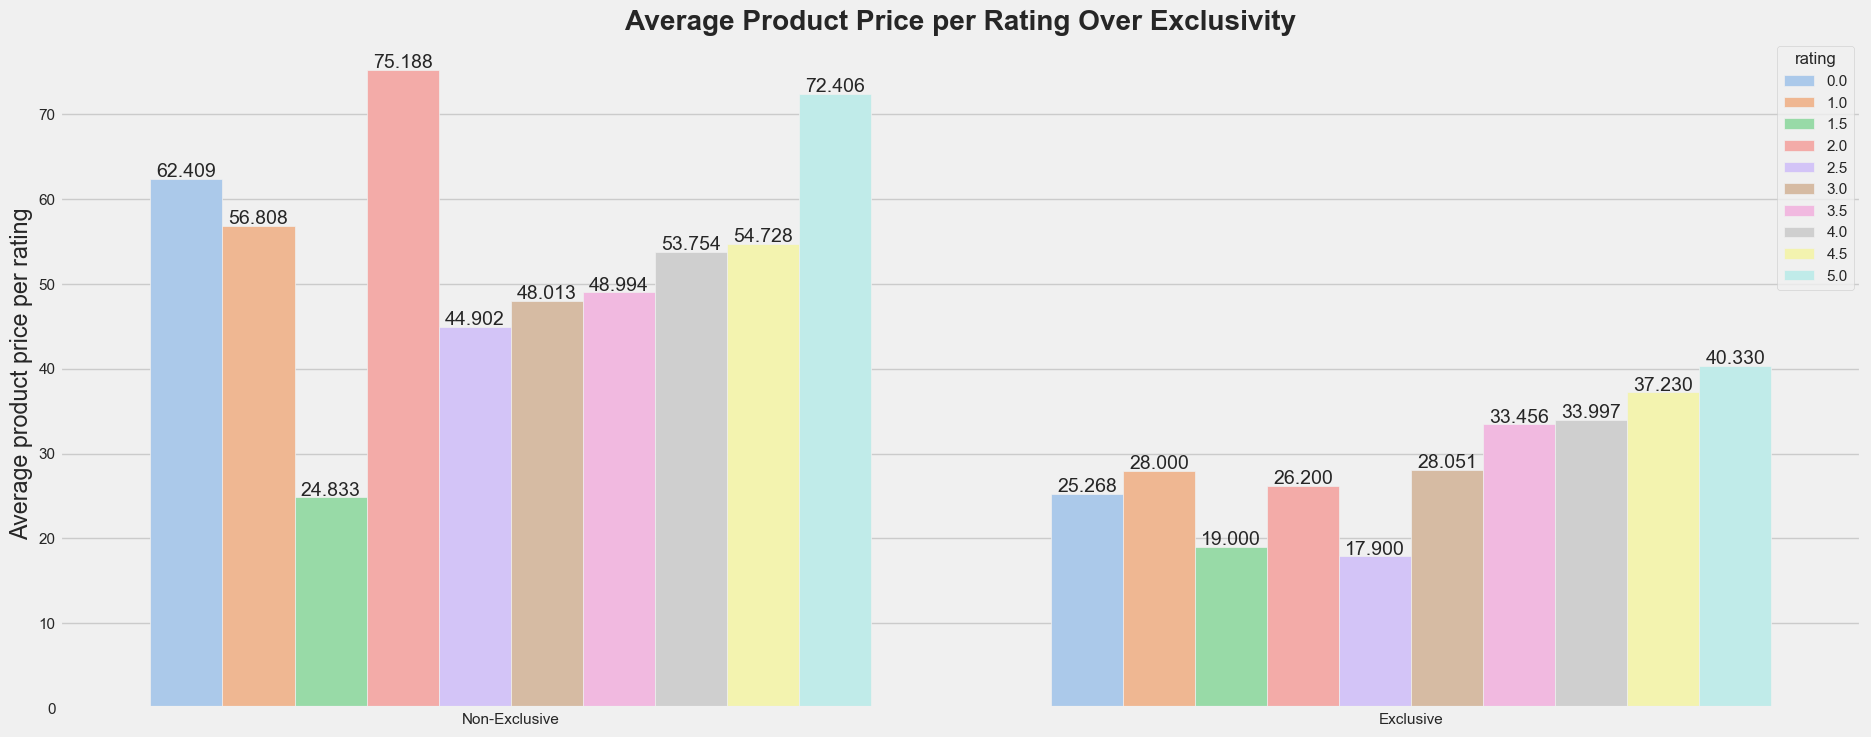

In [5]:
# Aggregating price with pivot
rate_price = pd.pivot_table(data, index='exclusive', values='price', columns='rating', aggfunc='mean').reset_index()

# Change values of exclusive column to be more readable data
rate_price['exclusive'] = rate_price['exclusive'].map({0: 'Non-Exclusive', 1: 'Exclusive'})

# Melting result for plot visualization
rate_melt = rate_price.melt(id_vars=['exclusive'], var_name='rating', value_name='avg_price')

# Plotting
ax = sns.barplot(data=rate_melt, x='exclusive', y='avg_price', hue='rating', palette='pastel')

# Add avg price as annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set x and y axis labels
plt.xlabel('')
plt.ylabel('Average product price per rating')
plt.title('Average Product Price per Rating Over Exclusivity', weight='bold')

# Display the plot
plt.show()

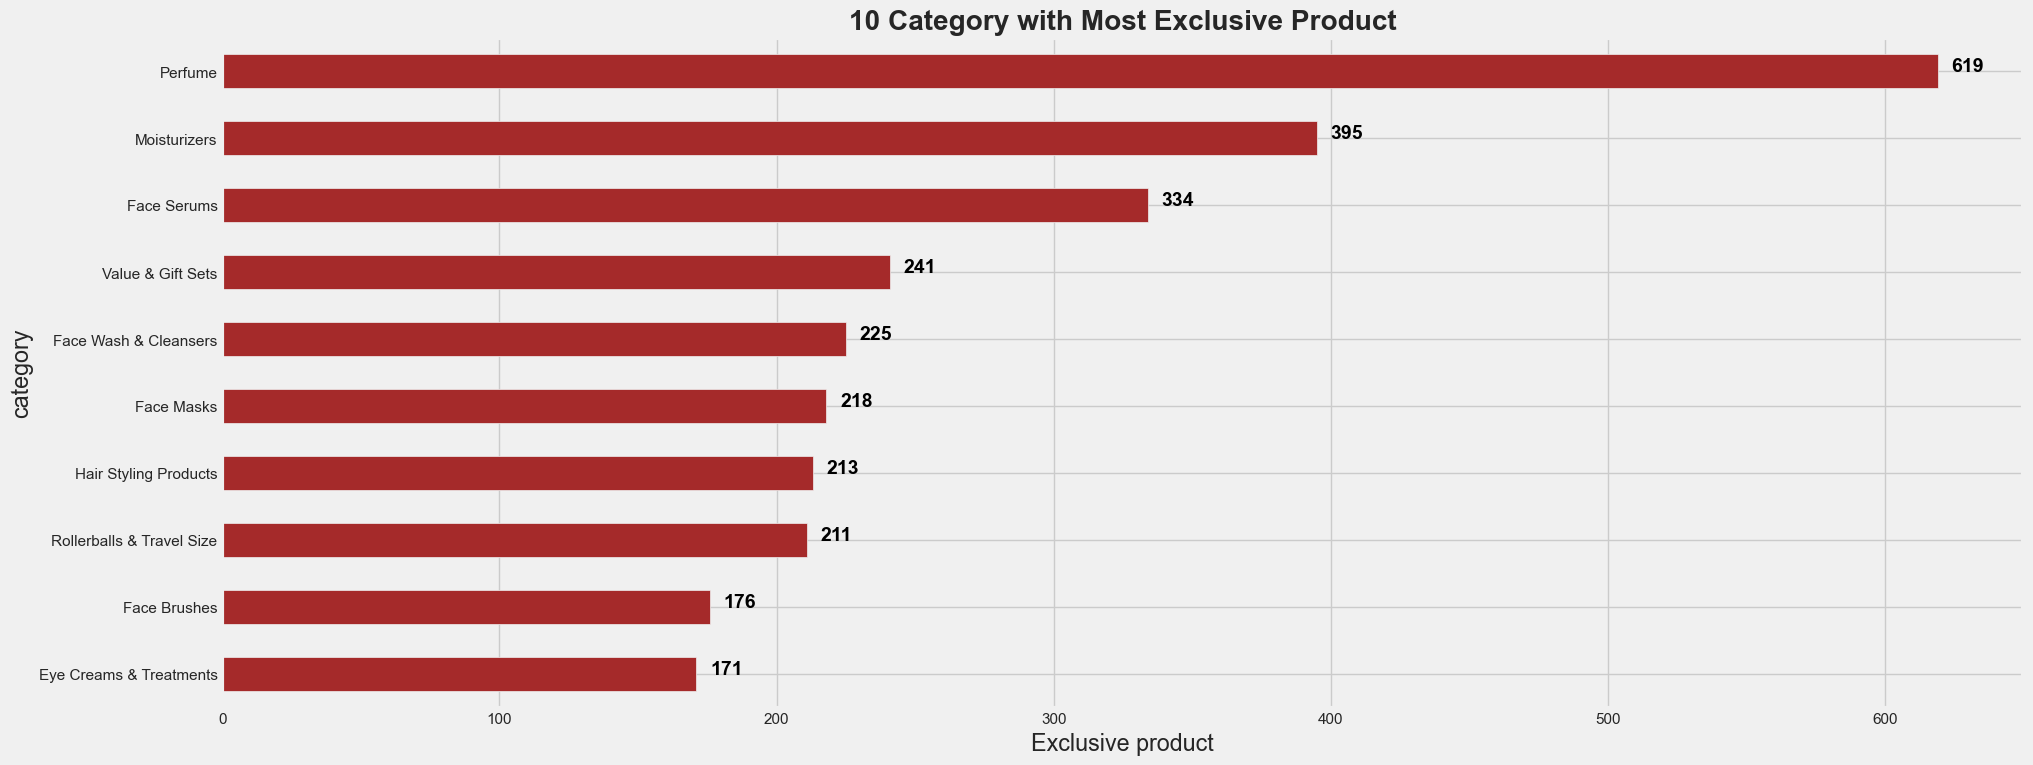

In [17]:
# 10 product category with the most exclusive product

# counting exclusive values and grouped by category
exclusive_cat = data.groupby('category')['exclusive'].count().sort_values(ascending=False).head(10)

# Plotting
ax = exclusive_cat.sort_values(ascending=True).plot(kind='barh', color='brown')

# adding value count to plot
for i, v in enumerate(exclusive_cat.sort_values(ascending=True)):
    ax.text(v + 5, i, '{:.0f}'.format(v), color='black', fontweight='bold')
    
plt.title('10 Category with Most Exclusive Product', fontweight='bold')
plt.xlabel('Exclusive product')
plt.show()

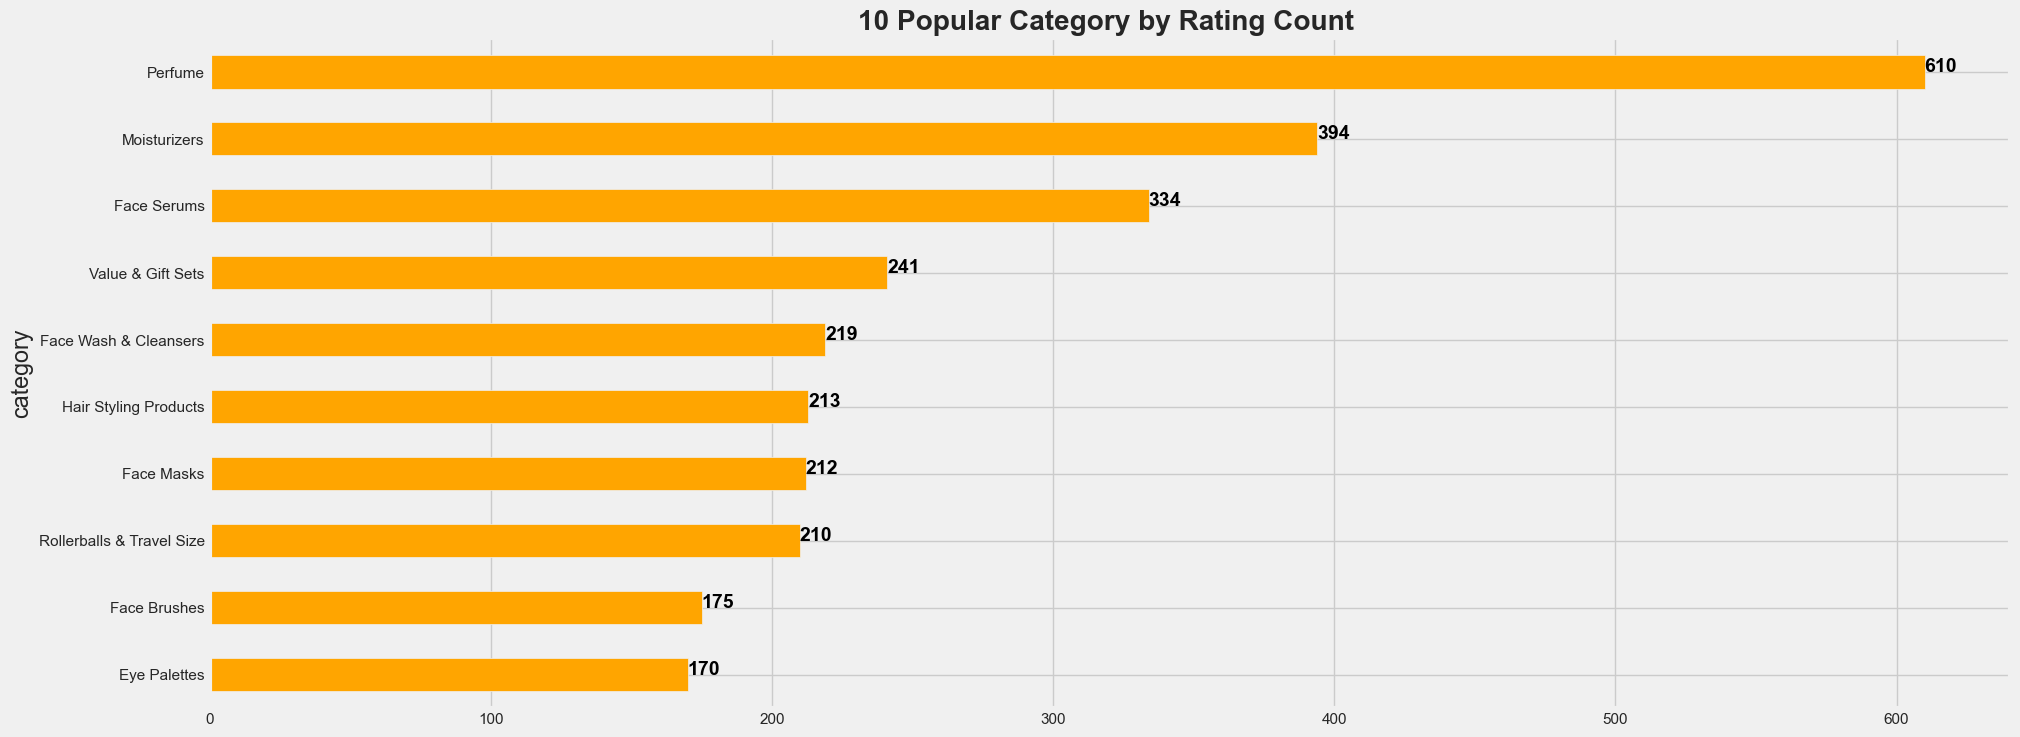

In [13]:
# 10 popular category by rating

# grouping df for exclusive product
cat_rating = data.groupby('category')['rating'].count().sort_values(ascending=False).head(10)

# plotting
ax = cat_rating.sort_values(ascending=True).plot(kind='barh', color='orange')

# Add annotations for rating
for i, v in enumerate(cat_rating.sort_values(ascending=True)):
    ax.text(v, i, '{:.0f}'.format(v), color='black', fontweight='bold')

# add title
plt.title('10 Popular Category by Rating Count ', weight='bold')

# Display the plot
plt.show()

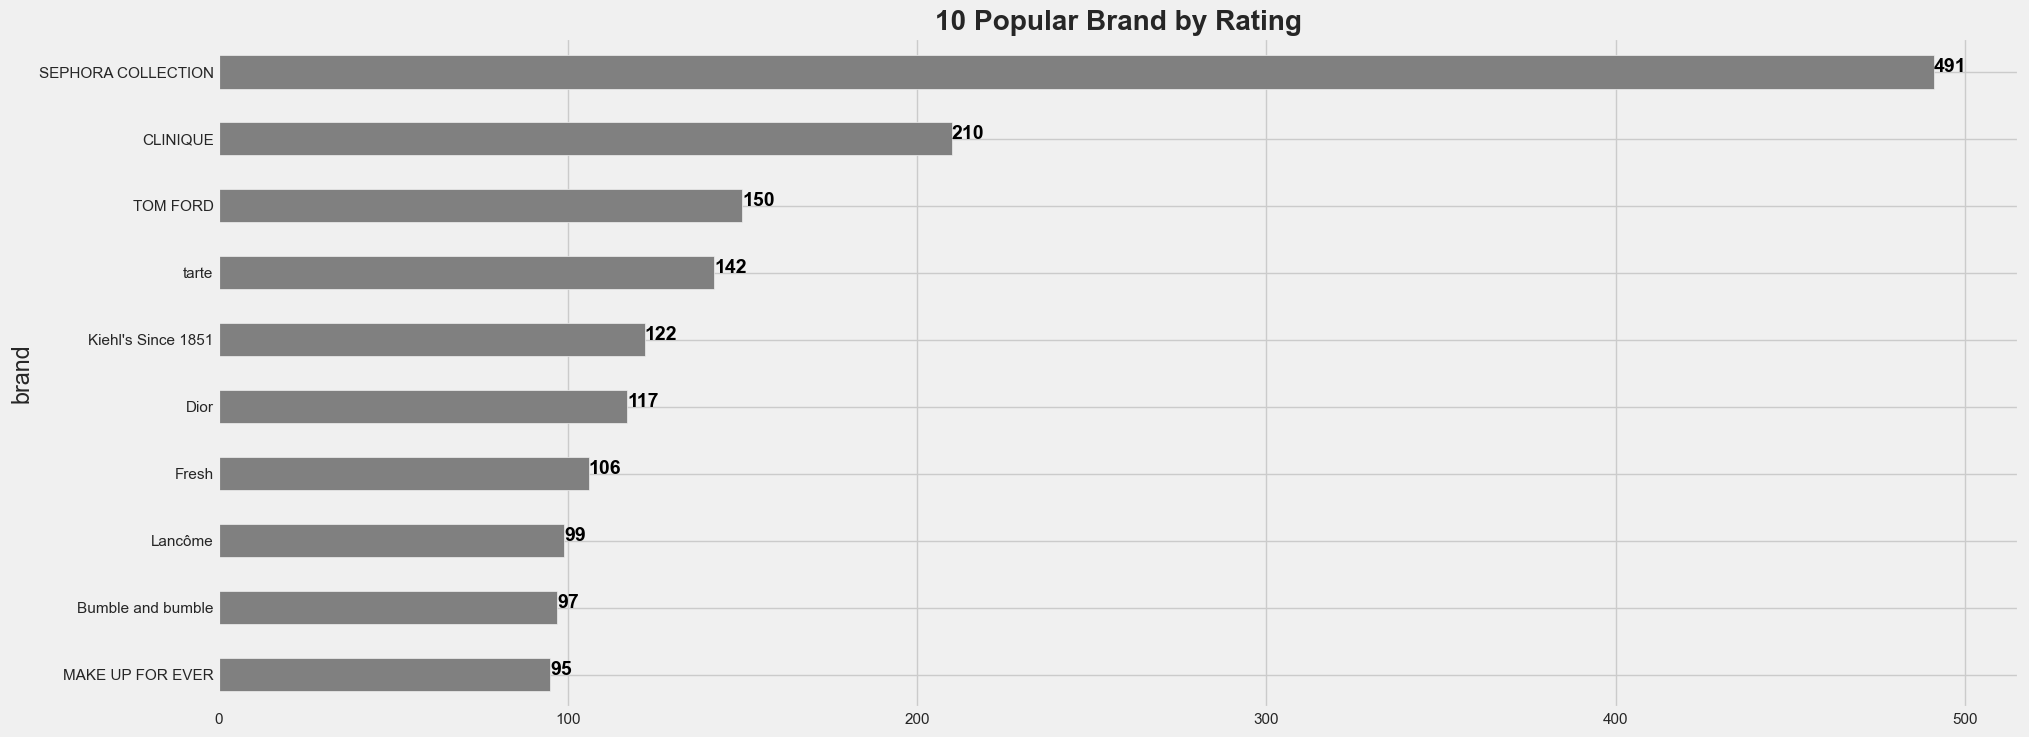

In [17]:
# top 10 brand by rating

# grouping df for exclusive product
brand_rating = data.groupby('brand')['rating'].count().sort_values(ascending=False).head(10)

# plotting
ax = brand_rating.sort_values(ascending=True).plot(kind='barh', color='grey')

# Add annotations for rating
for i, v in enumerate(brand_rating.sort_values(ascending=True)):
    ax.text(v, i, '{:.0f}'.format(v), color='black', fontweight='bold')

# add title
plt.title('10 Popular Brand by Rating', weight='bold')

# Display the plot
plt.show()

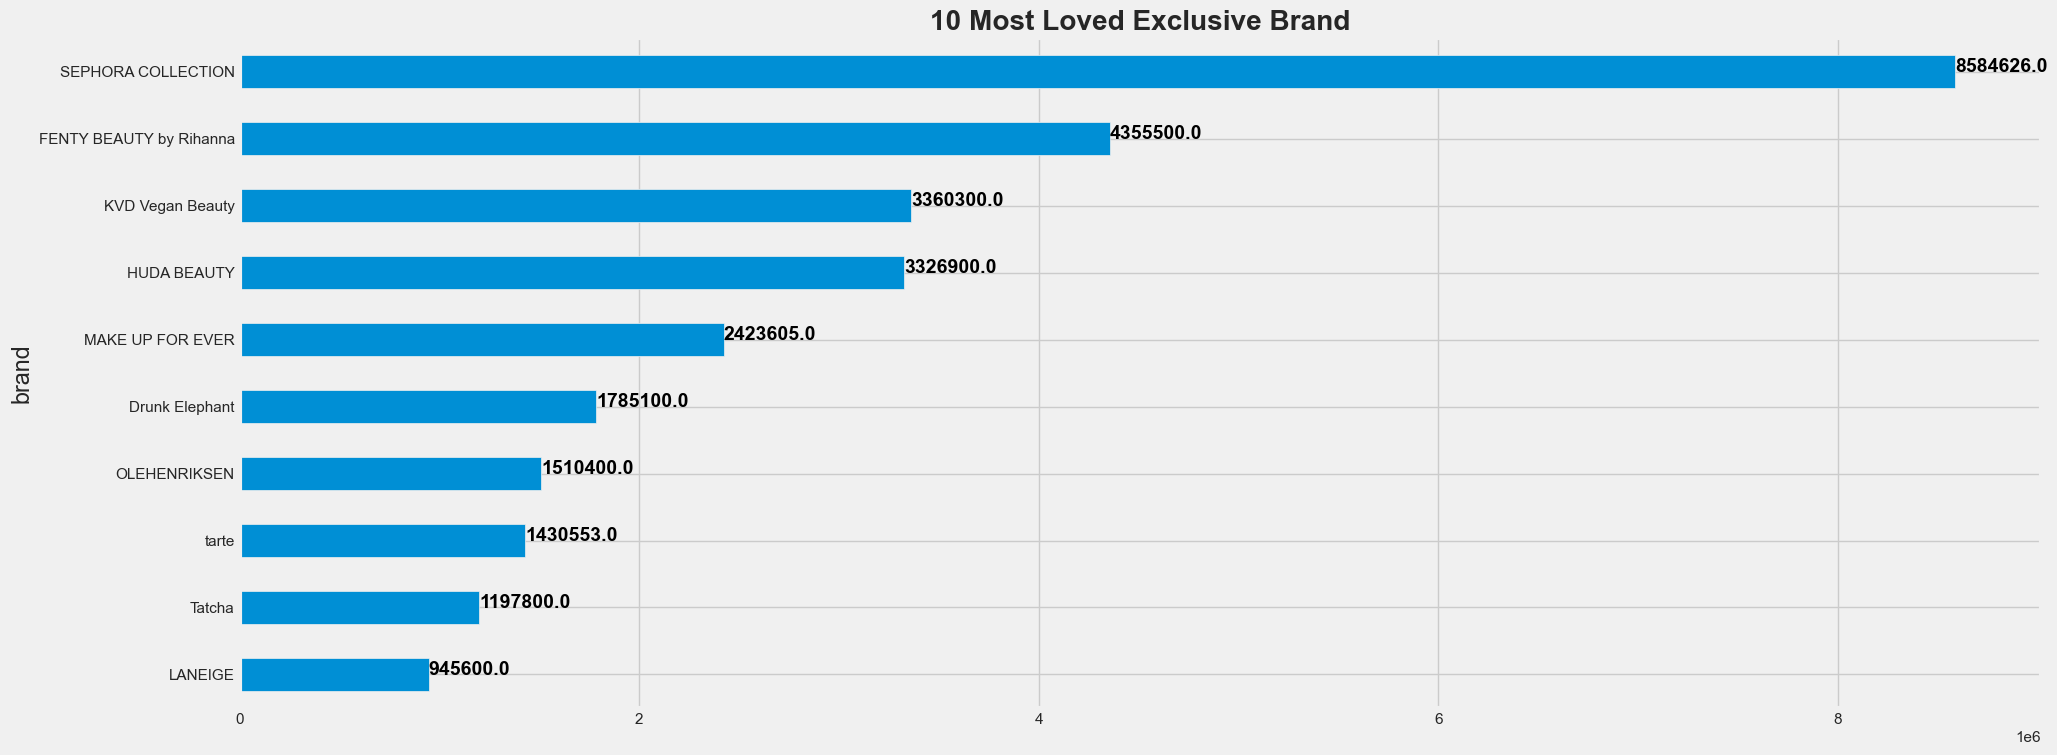

In [29]:
# 10 most liked exclusive brand

# grouping df for exclusive product
exc_like_brand = data[(data["exclusive"] == 1)].groupby('brand')['love'].sum().sort_values(ascending=False).head(10)

# plotting
ax = exc_like_brand.sort_values(ascending=True).plot(kind='barh')

# Add annotations for love values
for i, v in enumerate(exc_like_brand.sort_values(ascending=True)):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold')
    
# add title
plt.title('10 Most Loved Exclusive Brand', weight='bold')

# Display the plot
plt.show()

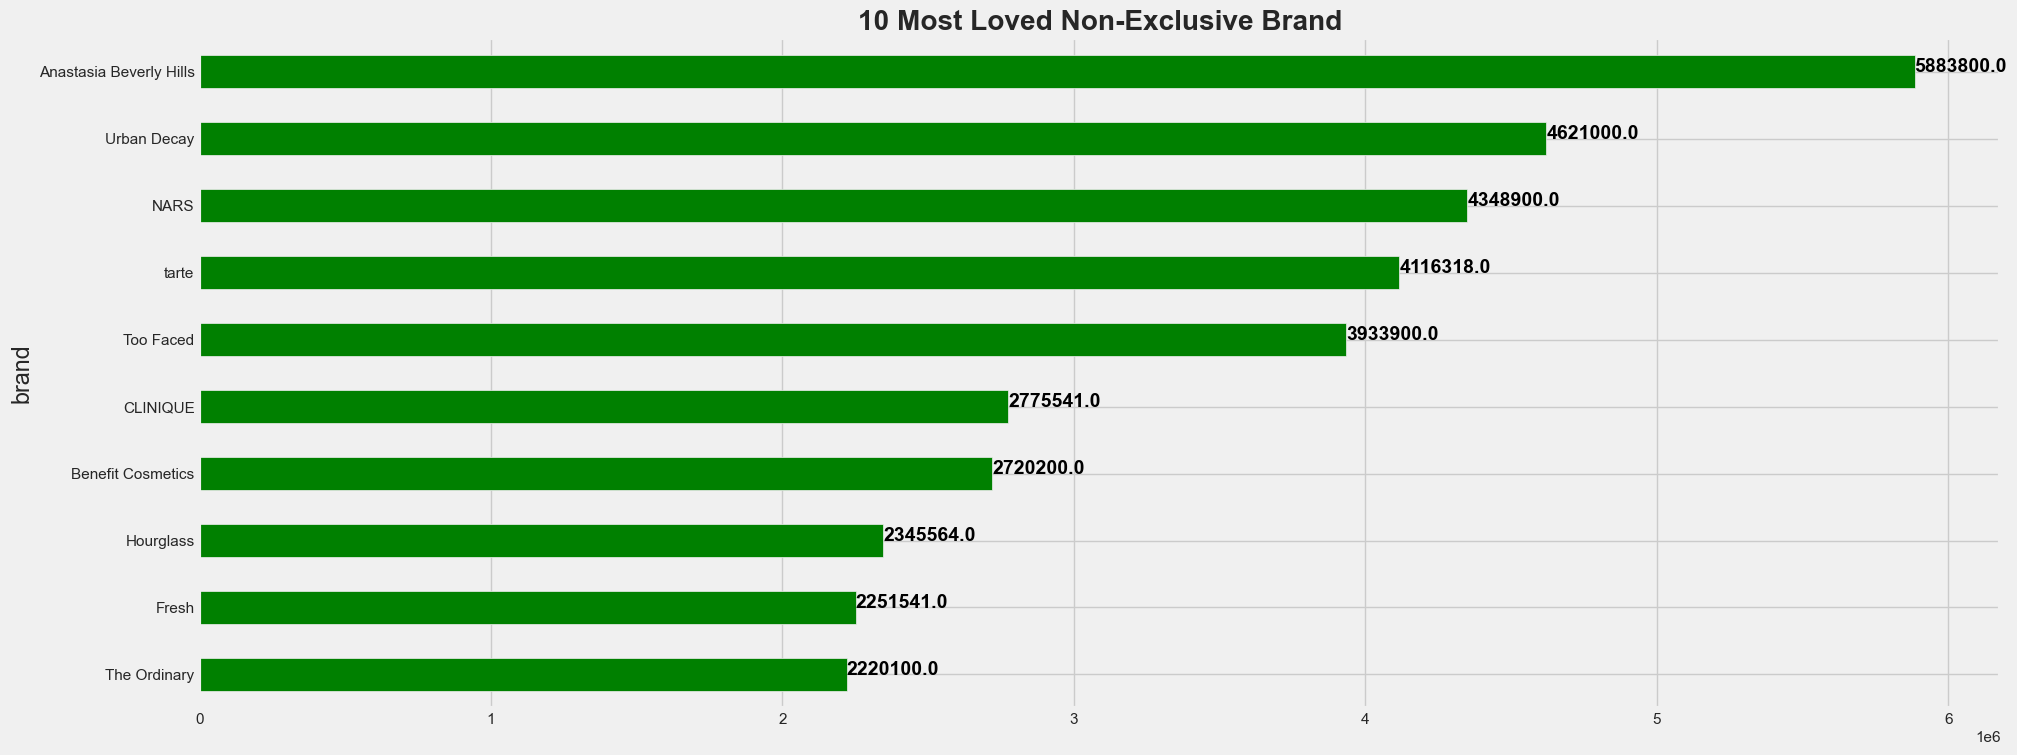

In [31]:
# 10 most liked non exclusive brand

# grouping df for exclusive product
reg_like_brand = data[(data["exclusive"] == 0)].groupby('brand')['love'].sum().sort_values(ascending=False).head(10)

# plotting
ax = reg_like_brand.sort_values(ascending=True).plot(kind='barh', color='green')

# Add annotations for love values
for i, v in enumerate(reg_like_brand.sort_values(ascending=True)):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold')

# add title
plt.title('10 Most Loved Non-Exclusive Brand', weight='bold')

# Display the plot
plt.show()

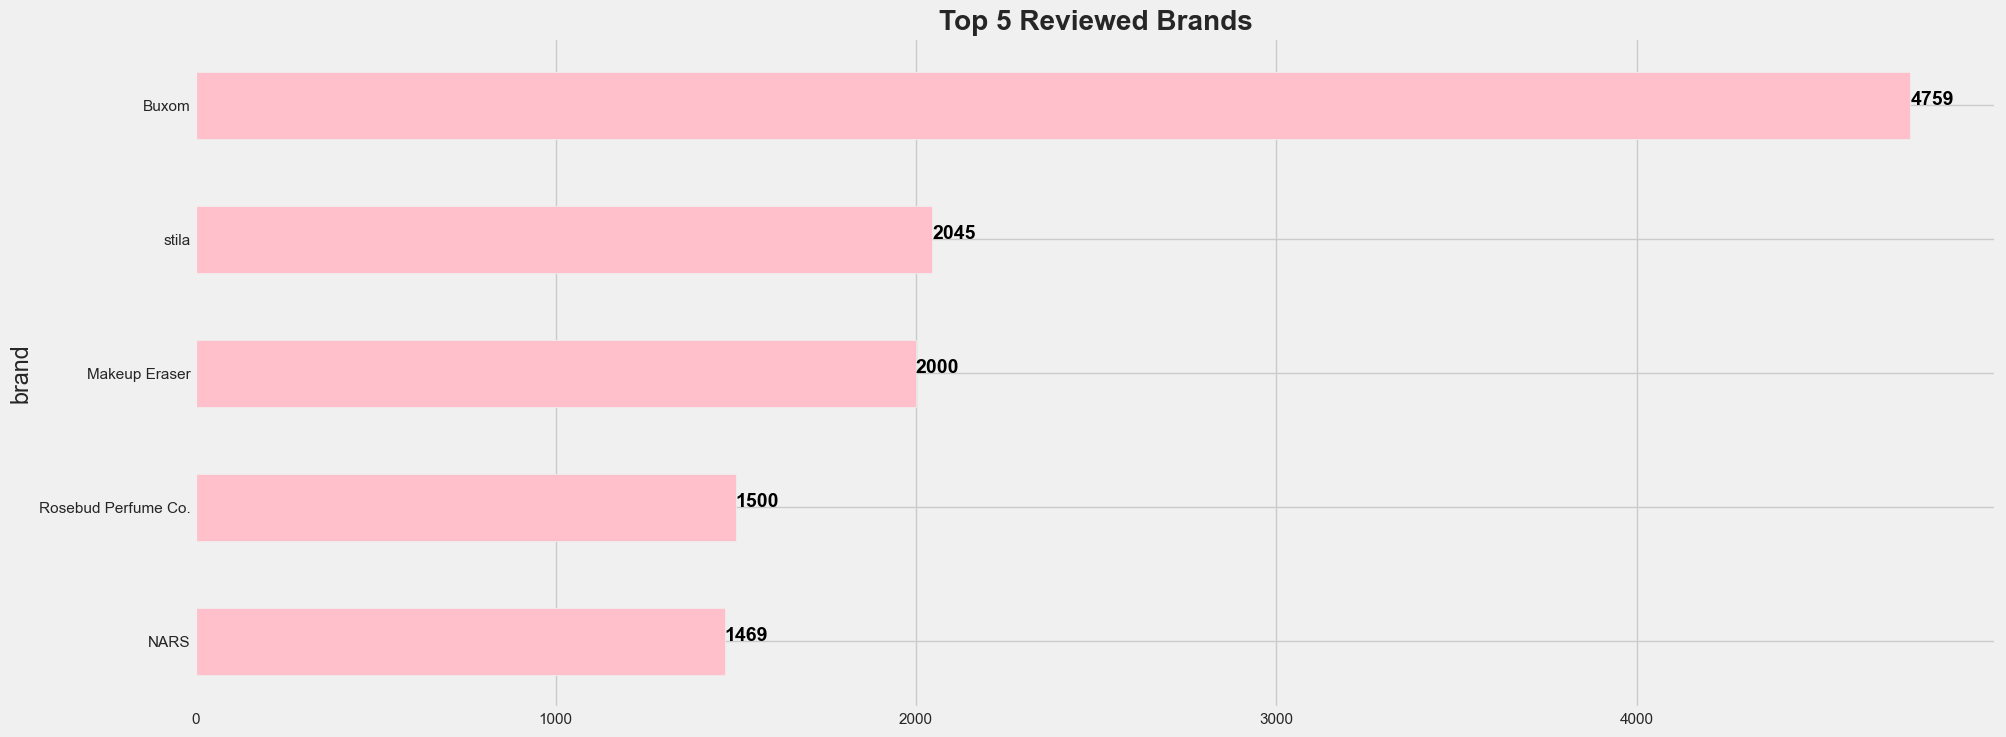

In [19]:
# 10 most reviewed brand

# grouping df for exclusive product
most_reviewed = data.groupby('brand')['number_of_reviews'].mean().sort_values(ascending=False).head(5)

# plotting
ax = most_reviewed.sort_values(ascending=True).plot(kind='barh', color='pink')

# Add annotations for rating
for i, v in enumerate(most_reviewed.sort_values(ascending=True)):
    ax.text(v, i, '{:.0f}'.format(v), color='black', fontweight='bold')

# add title
plt.title('Top 5 Reviewed Brands', weight='bold')

# Display the plot
plt.show()

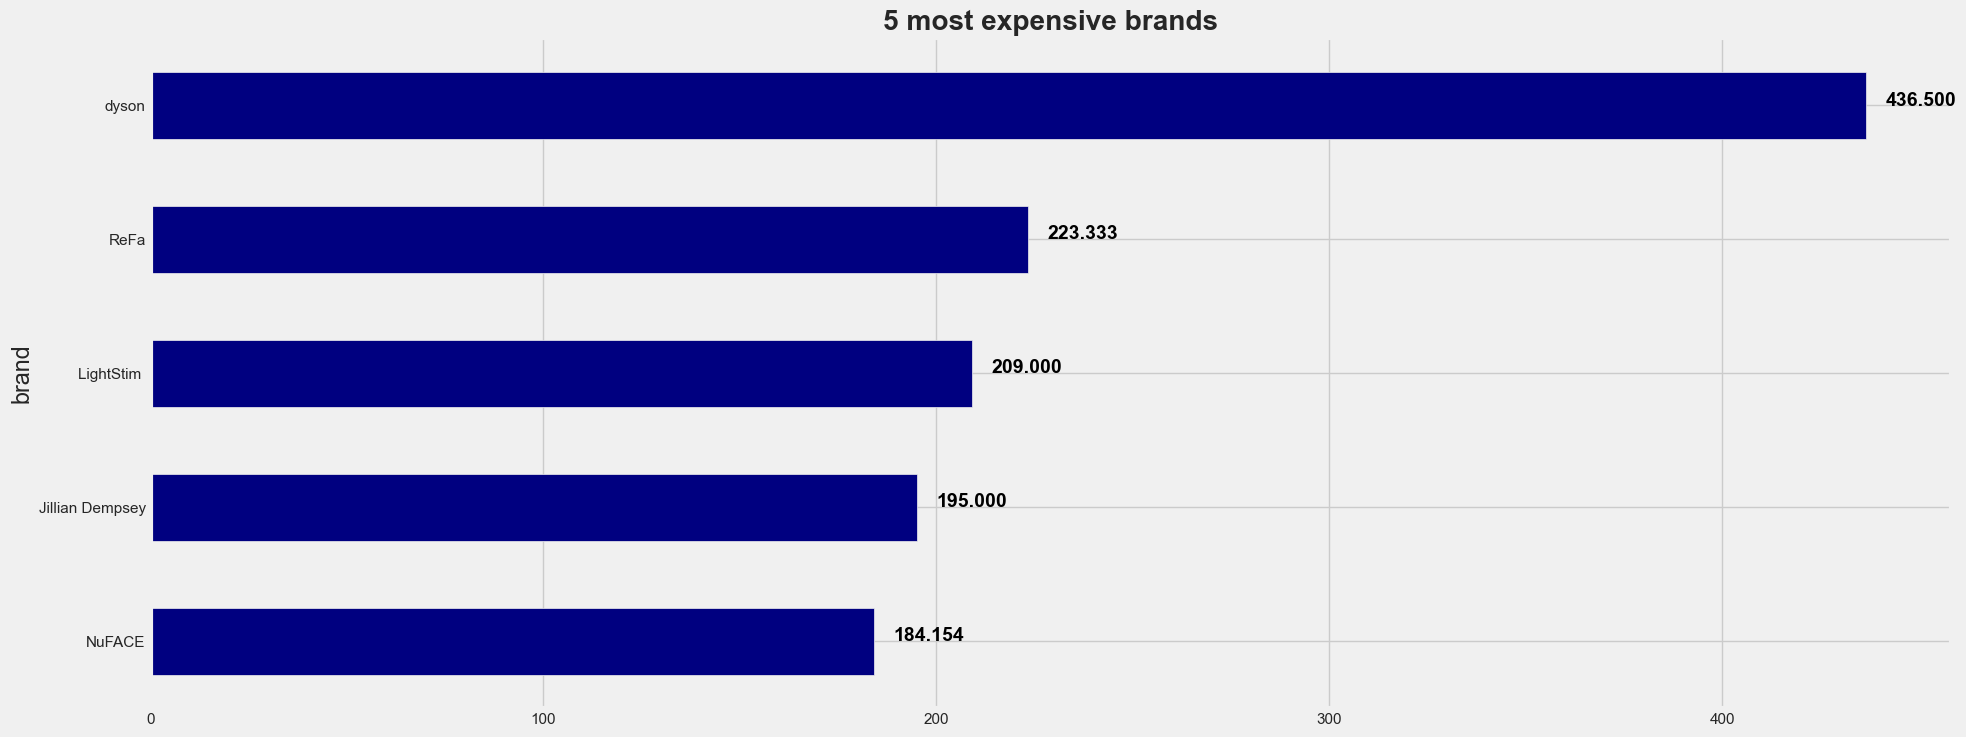

In [26]:
# 5 most expensive brand

expensive_brands = data.groupby('brand')['price'].mean().sort_values(ascending=False).head(5)

# plotting
ax = expensive_brands.sort_values(ascending=True).plot(kind='barh', color='navy')

# Add annotations for rating
for i, v in enumerate(expensive_brands.sort_values(ascending=True)):
    ax.text(v + 5, i, '{:.3f}'.format(v), color='black', fontweight='bold')

# add title
plt.title('5 most expensive brands', weight='bold')

# Display the plot
plt.show()

# Insight

Here are several insights that can be derived from the above univariate and multivariate analysis:

Univariate:
- Most numerical columns, except for the rating, exhibit outliers.
- The majority of numerical columns have skewed distributions.
- There are noticeable variations in the distribution shapes among the numerical columns, particularly in the `price` column.
- The categorical columns have relatively balanced distributions, with the largest category proportion being less than 10%.

Multivariate:
- the `id` column will be ommited as it is not relevant to the target
- There is multicollinearity between the `price` and `value_price` columns, indicating that one of them could be omitted.
- The `love` and `review` columns show a high correlation, but it is not strong enough to warrant the removal of either column.
- No numerical column demonstrates a strong correlation with the target variable (`exclusive`).
- The pairplot does not reveal distinct patterns or clusters, suggesting the potential need for a nonlinear model.

# Business Insight 

- The average price for non exclusive product are higher than the exclusive product `54.986 : 35.123`.

- Exclusive product that have a rating `5.0` have an average price of `40.330` this average rating price is also the highest compared to other rating (1.0 - 4.5). meanwhile average price rating `5.0` for non exclusive product is significantly higher `72.406`, this rating 5.0 average price is the second highest for non exclusive product rating. rating `2.0` have the highest average price which is `75.188`.

- The categories with the highest number of exclusive products are `Perfume, Moisturizers, Face Serums, Value & Gift Sets, Face Wash & Cleansers, Face Masks, Hair Styling Products, Rollerballs & Travel Size, Face Brushes, and Eye Creams & Treatments`. Among these categories, Perfume stands out with the highest product count of `619`. 

- In the categories examined, the Lid Shadow Brush stands out with the highest average rating of `5.0`, reflecting exceptional customer satisfaction. Additionally, Body Products and Cologne have received significantly high average ratings, indicating their strong popularity and positive reception among consumers.

- For the brands, that have been assessed. Montblanc, Aether Beauty, and Four Sigmatic have attained a flawless average rating of `5.0`, signifying exceptional customer satisfaction. Furthermore, Golde, ReFa, and RODIN olio lusso have received notably high average ratings, underscoring their popularity and positive reception among consumers.

- When evaluating the brands, Buxom, stila, Makeup Eraser, Rosebud Perfume Co., and NARS emerged as the top 5 brands that received the highest number of customer reviews. Notably, Buxom garnered the maximum number of reviews, with an impressive count of `4759`, showcasing a significant level of customer engagement. On the other hand, NARS received a considerable number of reviews as well, with a minimum count of `1469`, reflecting the active participation of customers in providing feedback for these brands.

- The analysis reveals the top 5 most expensive brands based on the average price of their products. Dyson takes the lead with an average price of `$436.50`, followed by ReFa at `$223.33`, LightStim at `$209.00`, Jillian Dempsey at `$195.00`, and NuFACE at `$184.15`.

In [10]:
# export data to csv for dasboarding purposes
viz_data = data.copy()

# dropping null values
viz_data.dropna(inplace=True)

# dropping duplicated values
viz_data.drop_duplicates(inplace=True)

# exporting data
viz_data.to_csv('Dataset/viz_data.csv',index=False)